In [ ]:
# 패키지
# %pip install -q python-dotenv langchain-openai langgraph langchain-community


In [13]:
from dotenv import load_dotenv

load_dotenv()

True

In [14]:
# 간단한 질문 테스트
from langchain_openai import ChatOpenAI

query = 'llm과 같이 주식 투자하는거 어떨까요?'
#
llm = ChatOpenAI(model='gpt-4o-mini') # 작은 모델
llm.invoke(query)


AIMessage(content='LLM(대규모 언어 모델)을 사용하여 주식 투자에 접근하는 것은 흥미로운 아이디어입니다. LLM은 광범위한 데이터와 패턴을 분석하고 정보를 제공하는 데 유용할 수 있습니다. 하지만 몇 가지 고려사항이 있습니다.\n\n1. **정보 분석**: LLM은 과거 데이터와 뉴스, 금융 보고서 등을 기반으로 정보를 분석할 수 있습니다. 이를 통해 특정 회사나 산업에 대한 통찰력을 제공받을 수 있습니다.\n\n2. **리스크 관리**: 주식 시장은 변동성이 크고 예측하기 어려운 요소가 많습니다. LLM의 분석 결과를 맹신하기보다는 여러 가지 정보를 종합하여 판단하는 것이 중요합니다.\n\n3. **최신 정보 반영**: LLM은 훈련된 데이터에 기반하므로 최신 시장 동향이나 사건을 반영하기 어려운 경우가 많습니다. 따라서 LLM의 정보를 사용할 때는 항상 현재의 시장 상황과 최신 뉴스를 확인하는 것이 좋습니다.\n\n4. **심리적 요소**: 주식 투자는 종종 투자자의 감정과 심리가 크게 작용합니다. LLM은 데이터 기반으로 분석하지만 인간의 감정적 요소를 완전히 이해하거나 반영하지 못할 수 있습니다.\n\n5. **결과 검증**: LLM을 통해 얻은 투자 전략이나 조언은 실제로 검증해보고, 성과를 분석하는 과정이 필요합니다.\n\n결론적으로, LLM과 함께 주식 투자하는 것은 유익할 수 있지만, 다른 여러 요소와 정보를 함께 고려하여 신중하게 접근하는 것이 중요합니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 345, 'prompt_tokens': 20, 'total_tokens': 365, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction

In [15]:
# State 생성
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [16]:
from langgraph.graph import StateGraph
graph_builder = StateGraph(AgentState)

In [17]:
def generate(state: AgentState) -> AgentState:
    """
    Generates a new state for the agent based on the given state.

    This function takes an existing state of an agent and processes it
    to generate a new state. The transformation from the input state
    to the output state adheres to specific rules or logic defined in
    the function.

    :param state: The current state of the agent.
    :type state: AgentState
    :return: A new state derived from the input state.
    :rtype: AgentState
    """
    messages = state['messages']
    ai_message = llm.invoke(messages[-1].content)
    return {'messages': [ai_message]}

In [18]:
graph_builder.add_node('generate', generate)


In [19]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)


In [8]:
graph = graph_builder.compile()

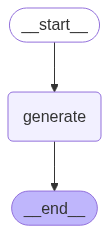

In [20]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
from langchain_core.messages import HumanMessage

query="현재 2025년 7월에 삼성전자 주식에 투자하는 건 어떨까?"
initial_state={'messages': [HumanMessage(query)]}
graph.invoke(initial_state)

{'messages': [HumanMessage(content='현재 2025년 7월에 삼성전자 주식에 투자하는 건 어떨까?', additional_kwargs={}, response_metadata={}, id='0dc55645-247d-40c6-b114-332446c6e0fc'),
  AIMessage(content='2025년 7월에 삼성전자 주식에 투자하는 것에 대한 결정을 하려면 여러 가지 요소를 고려해야 합니다. 기본적으로 다음과 같은 사항들을 검토하는 것이 좋습니다:\n\n1. **재무 성과**: 삼성전자의 최근 재무 성과와 미래 성장 가능성을 분석해야 합니다. 매출, 이익, 부채 비율 및 주가 수익 비율(PER) 등을 고려해보세요.\n\n2. **산업 동향**: 반도체, 전자제품, 모바일 기기 등 삼성전자가 주요 사업을 하고 있는 분야의 시장 동향 및 경쟁 상황을 분석할 필요가 있습니다.\n\n3. **글로벌 경제 상황**: 2025년의 글로벌 경제 전망과 지정학적 리스크, 통화 정책 등을 고려해야 합니다. 이러한 요소들은 주가에 큰 영향을 미칠 수 있습니다.\n\n4. **기술 혁신**: 삼성전자는 기술 혁신에 적극적으로 투자하고 있으므로, 새로운 제품이나 기술 개발 계획이 향후 주가에 어떻게 영향을 미칠지 분석해야 합니다.\n\n5. **전문가 의견 및 분석**: 금융 전문가나 애널리스트의 의견 및 연구 보고서를 참고하는 것도 좋은 방법입니다. 그들의 전망이 여러분의 투자 결정에 어떤 영향을 미칠 수 있는지를 고려하세요.\n\n6. **개인 투자 목표**: 자신의 투자 목표, 기간, 리스크 수용 능력 등을 명확히 하고 이에 맞는 결정을 내리는 것이 중요합니다.\n\n미래의 주식 투자에 대해 예측하는 것은 본질적으로 불확실성을 동반하므로, 신중한 접근이 필요합니다. 전문가와 상담하거나 전문 자료를 참고하면서 결정을 내리는 것이 좋습니다.', additional_kwargs={'refusal': None}, response_metadata={'t